In [1]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Download a file based on its file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1ZPJ1lCo3AEyIfjfgIoFhgmCM2pzWGWSM' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile("kidney_disease.csv")  

In [4]:
!pip install scikit-plot

In [5]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import time
import scikitplot as skplt
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score,log_loss

In [6]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df = df.drop(columns = ['id'])
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia', 'class']

df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.shape

(400, 25)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
col_names = df.columns.tolist()
col_names

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

In [12]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [13]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

packed_cell_volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values

white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '

In [14]:
def preprocess(s):
    if s == np.nan:
        return s
    else:
        s = str(s)
        if s.strip() == '?' or s.strip() == 'nan':
            return np.nan
        else:
            return s.strip()

for i in cat_cols:
    df[i] = df[i].apply(lambda x:preprocess(x))

In [15]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

packed_cell_volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54'] values

white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '12300' '

In [16]:
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [17]:
df.shape

(400, 25)

In [18]:
df = df.dropna()
df.shape

(158, 25)

In [19]:
df['packed_cell_volume'] = df['packed_cell_volume'].astype('float64',errors='ignore')
df['white_blood_cell_count'] = df['white_blood_cell_count'].astype('float64',errors='ignore')
df['red_blood_cell_count'] = df['red_blood_cell_count'].astype('float64',errors='ignore')

In [20]:
df['class'] = df['class'].map({'ckd': 0, 'notckd': 1})
df['class'] = df['class'].astype('int64',errors='ignore')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      158 non-null    float64
 1   blood_pressure           158 non-null    float64
 2   specific_gravity         158 non-null    float64
 3   albumin                  158 non-null    float64
 4   sugar                    158 non-null    float64
 5   red_blood_cells          158 non-null    object 
 6   pus_cell                 158 non-null    object 
 7   pus_cell_clumps          158 non-null    object 
 8   bacteria                 158 non-null    object 
 9   blood_glucose_random     158 non-null    float64
 10  blood_urea               158 non-null    float64
 11  serum_creatinine         158 non-null    float64
 12  sodium                   158 non-null    float64
 13  potassium                158 non-null    float64
 14  haemoglobin              1

In [22]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

d = {}
for col in cat_cols:
    d[col] = df[col].unique().tolist()
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has ['normal' 'abnormal'] values

pus_cell has ['abnormal' 'normal'] values

pus_cell_clumps has ['present' 'notpresent'] values

bacteria has ['notpresent' 'present'] values

hypertension has ['yes' 'no'] values

diabetes_mellitus has ['no' 'yes'] values

coronary_artery_disease has ['no' 'yes'] values

appetite has ['poor' 'good'] values

pedal_edema has ['yes' 'no'] values

anemia has ['yes' 'no'] values



In [23]:
d

{'anemia': ['yes', 'no'],
 'appetite': ['poor', 'good'],
 'bacteria': ['notpresent', 'present'],
 'coronary_artery_disease': ['no', 'yes'],
 'diabetes_mellitus': ['no', 'yes'],
 'hypertension': ['yes', 'no'],
 'pedal_edema': ['yes', 'no'],
 'pus_cell': ['abnormal', 'normal'],
 'pus_cell_clumps': ['present', 'notpresent'],
 'red_blood_cells': ['normal', 'abnormal']}

In [24]:
df['anemia'] = df['anemia'].map({'yes':1,'no':0})
df['coronary_artery_disease'] = df['coronary_artery_disease'].map({'yes':1,'no':0})
df['hypertension'] = df['hypertension'].map({'yes':1,'no':0})
df['pedal_edema'] = df['pedal_edema'].map({'yes':1,'no':0})
df['diabetes_mellitus'] = df['diabetes_mellitus'].map({'yes':1,'no':0})

df['bacteria'] = df['bacteria'].map({'present':1,'notpresent':0})
df['pus_cell_clumps'] = df['pus_cell_clumps'].map({'present':1,'notpresent':0})

df['red_blood_cells'] = df['red_blood_cells'].map({'abnormal':1,'normal':0})
df['pus_cell'] = df['pus_cell'].map({'abnormal':1,'normal':0})

df['appetite'] = df['appetite'].map({'good':1,'poor':0})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      158 non-null    float64
 1   blood_pressure           158 non-null    float64
 2   specific_gravity         158 non-null    float64
 3   albumin                  158 non-null    float64
 4   sugar                    158 non-null    float64
 5   red_blood_cells          158 non-null    int64  
 6   pus_cell                 158 non-null    int64  
 7   pus_cell_clumps          158 non-null    int64  
 8   bacteria                 158 non-null    int64  
 9   blood_glucose_random     158 non-null    float64
 10  blood_urea               158 non-null    float64
 11  serum_creatinine         158 non-null    float64
 12  sodium                   158 non-null    float64
 13  potassium                158 non-null    float64
 14  haemoglobin              1

In [26]:
col_names = df.columns.tolist()
col_names

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

In [27]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,0,1,1,0
9,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29.0,12100.0,3.7,1,1,0,0,0,1,0
11,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32.0,4500.0,3.8,1,1,0,0,1,0,0
14,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16.0,11000.0,2.6,1,1,1,0,1,0,0
20,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24.0,9200.0,3.2,1,1,1,0,1,1,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      158 non-null    float64
 1   blood_pressure           158 non-null    float64
 2   specific_gravity         158 non-null    float64
 3   albumin                  158 non-null    float64
 4   sugar                    158 non-null    float64
 5   red_blood_cells          158 non-null    int64  
 6   pus_cell                 158 non-null    int64  
 7   pus_cell_clumps          158 non-null    int64  
 8   bacteria                 158 non-null    int64  
 9   blood_glucose_random     158 non-null    float64
 10  blood_urea               158 non-null    float64
 11  serum_creatinine         158 non-null    float64
 12  sodium                   158 non-null    float64
 13  potassium                158 non-null    float64
 14  haemoglobin              1

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,158.0,49.563291,15.512244,6.000,39.25,50.50,60.000,83.000
blood_pressure,158.0,74.050633,11.175381,50.000,60.00,80.00,80.000,110.000
specific_gravity,158.0,1.019873,0.005499,1.005,1.02,1.02,1.025,1.025
albumin,158.0,0.797468,1.413130,0.000,0.00,0.00,1.000,4.000
sugar,158.0,0.253165,0.813397,0.000,0.00,0.00,0.000,5.000
red_blood_cells,158.0,0.113924,0.318729,0.000,0.00,0.00,0.000,1.000
pus_cell,158.0,0.183544,0.388343,0.000,0.00,0.00,0.000,1.000
pus_cell_clumps,158.0,0.088608,0.285080,0.000,0.00,0.00,0.000,1.000
bacteria,158.0,0.075949,0.265759,0.000,0.00,0.00,0.000,1.000
blood_glucose_random,158.0,131.341772,64.939832,70.000,97.00,115.50,131.750,490.000


In [ ]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape,X_test.shape

((118, 24), (40, 24))

In [ ]:
y_train.shape,y_test.shape

((118,), (40,))

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
i = tf.keras.layers.Input(shape = X_train[0].shape)
x = tf.keras.layers.Dense(64, activation = tf.nn.relu, name='hidden_layer_2') (i)
x = tf.keras.layers.Dense(32, activation = tf.nn.relu, name='hidden_layer_3') (x)
x = tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, name='output_layer') (x)

In [ ]:
model = tf.keras.models.Model(inputs = i, outputs = x)

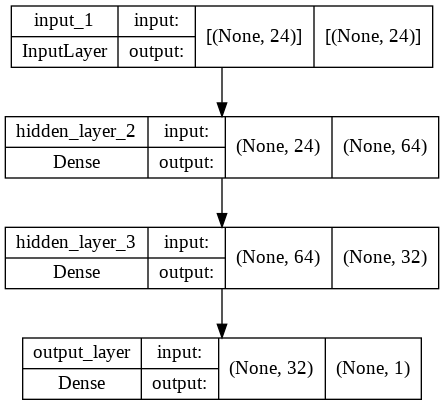

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                1600      
                                                                 
 hidden_layer_3 (Dense)      (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 3,713
Trainable params: 3,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def binary_balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()

  y_true = y_true.ravel()
  y_pred = np.round(y_pred.ravel())
  num_classes = len(np.unique(y_true))

  cm = confusion_matrix(y_true, y_pred).T
  balanced_accuracy = 0
  for i in range(num_classes):
    num = cm[i,i]
    den = np.sum(cm[:,i])
    if num == 0 :
      acc = 0
    else:
      acc = num / den
    balanced_accuracy += acc

  return (balanced_accuracy / num_classes)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = tf.keras.losses.binary_crossentropy, 
              metrics = binary_balanced_accuracy, run_eagerly=True)

In [ ]:
batch_size = 32
steps_per_epoch = X_train.shape[0] // batch_size
validation_batch_size = 32
validation_steps = X_test.shape[0] // validation_batch_size

In [ ]:
print('Results for ANN Classifier:-\n')
start_time = time.time()

result = model.fit(X_train, y_train, 
                   validation_data = (X_test, y_test), 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   epochs = 30)

model_time = (time.time() - start_time)
print('Training time(sec) = ',model_time)

Results for ANN Classifier:-

Epoch 1/30
3/3 [==============================] - 7s 376ms/step - loss: 0.7227 - binary_balanced_accuracy: 0.4667 - val_loss: 0.6705 - val_binary_balanced_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 1s 345ms/step - loss: 0.6774 - binary_balanced_accuracy: 0.5145 - val_loss: 0.6191 - val_binary_balanced_accuracy: 0.9286
Epoch 3/30
3/3 [==============================] - 1s 205ms/step - loss: 0.6236 - binary_balanced_accuracy: 0.9252 - val_loss: 0.5705 - val_binary_balanced_accuracy: 1.0000
Epoch 4/30
3/3 [==============================] - 1s 363ms/step - loss: 0.5626 - binary_balanced_accuracy: 1.0000 - val_loss: 0.5247 - val_binary_balanced_accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 1s 429ms/step - loss: 0.5255 - binary_balanced_accuracy: 0.9722 - val_loss: 0.4816 - val_binary_balanced_accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 1s 251ms/step - loss: 0.4708 - binary_balanced_accuracy: 0.9

In [ ]:
label = [0,1]

Prediction time(sec) =  0.07384133338928223


Training score =  1.0
Tesing score =  1.0


No of missclassified for class 0 (test data) = 0 
No of missclassified for class 1 (test data) = 0 
Total no of missclassified points(test data) =  0
Total % of missclassified points(test data) =  0.0


Training log_loss =  0.037534287582907305
Tesing log_loss =  0.03472393261326943


Confusion matrix:


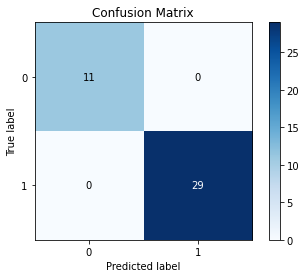



Classification report:-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        29

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

**************************************************************************


In [ ]:
y_pred1 = model.predict(X_train)
y_pred1 = np.round(y_pred1).flatten()

start_time = time.time()
y_pred = model.predict(X_test)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)

y_pred = np.round(y_pred).flatten()

y_pred_prob1 = np.concatenate(((1- model.predict(X_train)).T, model.predict(X_train).T),axis=0).T
y_pred_prob = np.concatenate(((1- model.predict(X_test)).T, model.predict(X_test).T),axis=0).T

cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)
loss1_model = log_loss(y_train,y_pred_prob1)
loss2_model = log_loss(y_test,y_pred_prob)


print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

for i in range(2):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))
print('\n\nTraining log_loss = ',loss1_model)
print('Tesing log_loss = ',loss2_model)

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

ANN = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),loss1_model,loss2_model,model_time,model_time2]

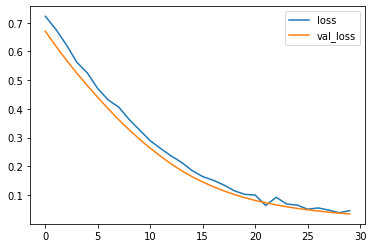

In [ ]:
plt.plot(result.history['loss'] , label = 'loss')
plt.plot(result.history['val_loss'] , label = 'val_loss')
plt.legend()
plt.show()

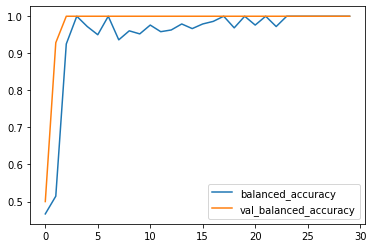

In [ ]:
plt.plot(result.history['binary_balanced_accuracy'] , label = 'balanced_accuracy')
plt.plot(result.history['val_binary_balanced_accuracy'] , label = 'val_balanced_accuracy')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_path = '/content/drive/MyDrive/LY Project/Kidney disease'
model_name = 'kidney_prediction_model'
model_path = save_path + '/' + model_name
model.save(model_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/LY Project/Kidney disease/kidney_prediction_model/assets


In [ ]:
import os

In [ ]:
os.chdir(save_path)
print(os.getcwd())

import joblib
joblib.dump(scaler, 'scaler.joblib')

/content/drive/MyDrive/LY Project/Kidney disease


['scaler.joblib']